### 서울시 인구현황_구.txt 파일 불러오기

In [1]:
import pandas as pd
#파일이름은 영어로 하는게 좋음
#1행을 컬럼으로 하겠다
df = pd.read_csv('data/서울시 인구현황_구.txt',sep='\t',header=1) # EUC-KR, CP949

In [2]:
df.head()

,기간,자치구,세대,합계,합계.1,합계.2,한국인,한국인.1,한국인.2,등록외국인,등록외국인.1,등록외국인.2,인구밀도,인구밀도.1,세대당인구,65세이상고령자
0,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,인구밀도(명/㎢),면적(㎢),세대당인구,65세이상고령자
1,1991,합계,"3,330,317","10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,"18,014",605.33,3.27,…
2,1991,종로구,"78,169","236,806","119,127","117,679",…,…,…,…,…,…,"9,865",24.01,3.03,…
3,1991,중구,"61,495","184,142","93,312","90,830",…,…,…,…,…,…,"18,438",9.99,2.99,…
4,1991,용산구,"96,696","294,341","147,914","146,427",…,…,…,…,…,…,"13,460",21.87,3.04,…


In [3]:
df.drop(0, inplace=True) #맨윗줄 삭제

In [4]:
df.head()

,기간,자치구,세대,합계,합계.1,합계.2,한국인,한국인.1,한국인.2,등록외국인,등록외국인.1,등록외국인.2,인구밀도,인구밀도.1,세대당인구,65세이상고령자
1,1991,합계,"3,330,317","10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,"18,014",605.33,3.27,…
2,1991,종로구,"78,169","236,806","119,127","117,679",…,…,…,…,…,…,"9,865",24.01,3.03,…
3,1991,중구,"61,495","184,142","93,312","90,830",…,…,…,…,…,…,"18,438",9.99,2.99,…
4,1991,용산구,"96,696","294,341","147,914","146,427",…,…,…,…,…,…,"13,460",21.87,3.04,…
5,1991,성동구,"244,272","789,014","401,375","387,639",…,…,…,…,…,…,"23,273",33.9,3.23,…


### 세대 컬럼을 삭제

In [5]:
# df1 = df.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,-1]] ,마지막
df1 = df.drop(['세대'], axis=1)

In [6]:
df1.head(3)
df1 = df.drop(['인구밀도','인구밀도.1','세대당인구','65세이상고령자'],axis=1)
df1.head(3)

,기간,자치구,세대,합계,합계.1,합계.2,한국인,한국인.1,한국인.2,등록외국인,등록외국인.1,등록외국인.2,65세이상고령자
1,1991,합계,"3,330,317","10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,…
2,1991,종로구,"78,169","236,806","119,127","117,679",…,…,…,…,…,…,…
3,1991,중구,"61,495","184,142","93,312","90,830",…,…,…,…,…,…,…


#### 년도, 자치구, 총인구, 총인구(남) , 총인구(여) , 내국인, 내국인(남), 내국인(여) , 외국인, 외국인(남), 외국인(여), 65세이상 으로 컬럼명을 변경하세요.

In [2]:
df1.columns
# ['년도','자치구','총인구','총인구(남)','총인구(여)','내국인','내국인(남)','내국인(여)','외국인','외국인(남)','외국인(여)','65세이상']

NameError: name 'df1' is not defined

In [8]:
# df1 = df1.rename(columns={'합계':'총인구', '한국인' : '내국인'})
col = ['년도','자치구','총인구','총인구(남)','총인구(여)','내국인','내국인(남)','내국인(여)','외국인','외국인(남)','외국인(여)','65세이상']

In [9]:
for i in range(len(col)):
    df1.rename(columns={df1.columns[i] : col[i]}, inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      768 non-null    object
 1   자치구     768 non-null    object
 2   총인구     768 non-null    object
 3   총인구(남)  768 non-null    object
 4   총인구(여)  768 non-null    object
 5   내국인     768 non-null    object
 6   내국인(남)  768 non-null    object
 7   내국인(여)  768 non-null    object
 8   외국인     768 non-null    object
 9   외국인(남)  768 non-null    object
 10  외국인(여)  768 non-null    object
 11  65세이상   768 non-null    object
dtypes: object(12)
memory usage: 78.0+ KB


### 년도별 총인구(남)/총인구(여)값을 그래프로 작성

In [12]:
#object = 문자열
# pd.astype({'컬럼명':dtype})
# df2 = df1.loc[:,'년도':'총인구(여)']
df2 = df1.iloc[:, 0:5]


In [17]:
df2 = df2.astype({'년도':'int64'})


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      768 non-null    int64 
 1   자치구     768 non-null    object
 2   총인구     768 non-null    object
 3   총인구(남)  768 non-null    object
 4   총인구(여)  768 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.0+ KB


In [19]:
df2['총인구'] = df2['총인구'].str.replace(',','')
df2['총인구(남)'] = df2['총인구(남)'].str.replace(',','')
df2['총인구(여)'] = df2['총인구(여)'].str.replace(',','')
df2

,년도,자치구,총인구,총인구(남),총인구(여)
1,1991,합계,3330317,10904527,5485353
2,1991,종로구,78169,236806,119127
3,1991,중구,61495,184142,93312
4,1991,용산구,96696,294341,147914
5,1991,성동구,244272,789014,401375
...,...,...,...,...,...
764,2020,관악구,274811,509803,255211
765,2020,서초구,173502,429025,205282
766,2020,강남구,234872,544055,260378
767,2020,송파구,281959,673926,325080


In [24]:
df2 = df2.astype({'년도':int,'총인구':int,'총인구(남)':int,'총인구(여)':int})

In [31]:
df2.dtypes

년도         int32
자치구       object
총인구        int32
총인구(남)     int32
총인구(여)     int32
dtype: object

In [32]:
# 그리기 임포트
import matplotlib.pyplot as plt
%matplotlib inline

조회할 구 이름을 입력(예:종로구):종로구


<IPython.core.display.Javascript object>


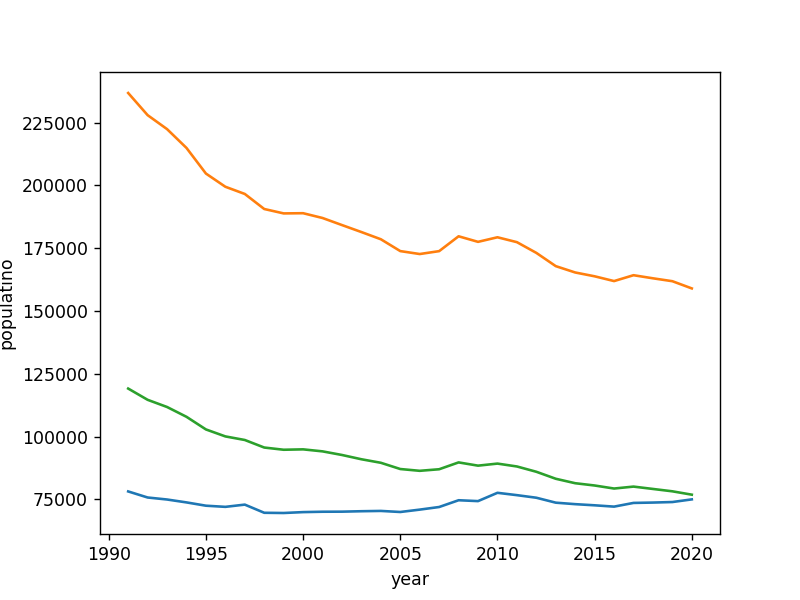

In [39]:
gu=input('조회할 구 이름을 입력(예:종로구):')

df3= df2[ df2['자치구']==gu]
plt.plot(df3['년도'],df3['총인구'])
plt.xlabel('year')
plt.ylabel('population')
plt.show()

plt.plot(df3['년도'],df3['총인구(남)'])
plt.plot(df3['년도'],df3['총인구(여)'])
plt.show()